# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# API url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# URL used for query
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

# Loop to gather weather data
set_count = 1
record_count = 1
weather_data = {"City":[],"Cloudiness":[],"Country":[],"Date":[],"Humidity":[],"Lat":[],"Lng":[],"Max Temp":[],"Wind Speed": []}
for city in cities:
    weather_response = requests.get(query_url + city)
    weather_response_json = weather_response.json()
    
    if weather_response.status_code == 200:
        weather_data["City"].append(city)
        weather_data["Cloudiness"].append(weather_response_json['clouds']['all'])
        weather_data["Country"].append(weather_response_json['sys']['country'])
        weather_data["Date"].append(weather_response_json['dt'])
        weather_data["Humidity"].append(weather_response_json['main']['humidity'])
        weather_data["Lat"].append(weather_response_json['coord']['lat'])
        weather_data["Lng"].append(weather_response_json['coord']['lon'])
        weather_data["Max Temp"].append(weather_response_json['main']['temp_max'])
        weather_data["Wind Speed"].append(weather_response_json['wind']['speed'])
        if record_count <= 50:
            print(f"Processing Record {record_count} of Set {set_count} | {city}")
            record_count += 1 
        else:
            record_count = 0
            set_count += 1
            print(f"Processing Record {record_count} of Set {set_count} | {city}")
            record_count += 1
    else:
        print("No city found here, skipping to next city")
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")
        

No city found here, skipping to next city
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | ust-karsk
Processing Record 6 of Set 1 | mehamn
Processing Record 7 of Set 1 | sampit
Processing Record 8 of Set 1 | chingirlau
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | san pedro
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | kokopo
Processing Record 15 of Set 1 | nishihara
Processing Record 16 of Set 1 | hualmay
Processing Record 17 of Set 1 | husavik
Processing Record 18 of Set 1 | rikitea
No city found here, skipping to next city
Processing Record 19 of Set 1 | vestmannaeyjar
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | mingaora
Processing Record 22 of Set 1 | krasnoborsk
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.DataFrame(weather_data)
weather_df.to_csv("weather_df.csv", index=False)

In [7]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,88,AU,1594606594,66,-33.65,115.33,64.00,14.63
1,nikolskoye,0,RU,1594606763,87,59.70,30.79,52.00,2.24
2,iqaluit,75,CA,1594606756,76,63.75,-68.51,53.60,9.17
3,mataura,83,NZ,1594606764,83,-46.19,168.86,45.00,4.92
4,ust-karsk,55,RU,1594606764,27,52.70,118.81,92.57,1.41


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#### I HAVE NO CITIES THAT QUALIFY FOR THIS EXERCISE

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
#### I HAVE NO CITIES THAT QUALIFY FOR THIS EXERCISE

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#### I HAVE NO CITIES THAT QUALIFY FOR THIS EXERCISE

In [9]:
# Extract relevant fields from the data frame
#### I HAVE NO CITIES THAT QUALIFY FOR THIS EXERCISE

# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

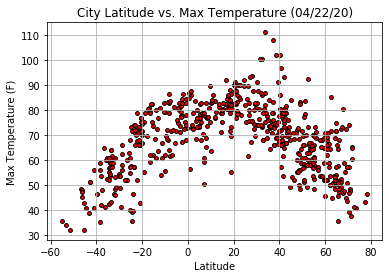

In [10]:

# Scatter Plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], s=15, c="red", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (04/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("Lat_vs_Max_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

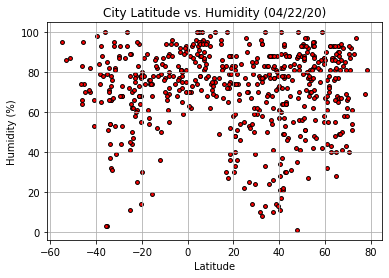

In [11]:

# Scatter Plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], s=15, c="red", edgecolors="black")
plt.title("City Latitude vs. Humidity (04/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("Lat_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

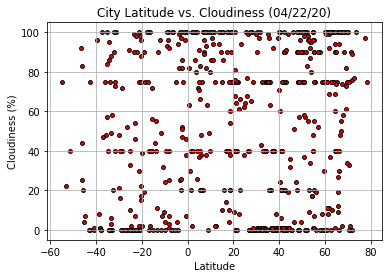

In [12]:
# Scatter Plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], s=15, c="red", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (04/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("Lat_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

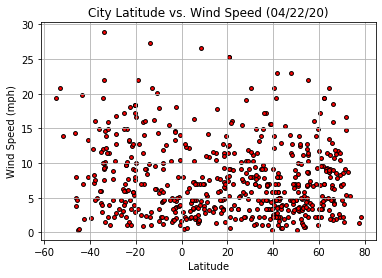

In [13]:
# Scatter Plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], s=15, c="red", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (04/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("Lat_vs_Wind.png")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [14]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_df.loc[weather_df["Lat"]>=0.01]
south_df = weather_df.loc[weather_df["Lat"]<=-0.01]
north_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,nikolskoye,0,RU,1594606763,87,59.70,30.79,52.00,2.24
2,iqaluit,75,CA,1594606756,76,63.75,-68.51,53.60,9.17
4,ust-karsk,55,RU,1594606764,27,52.70,118.81,92.57,1.41
5,mehamn,0,NO,1594606764,81,71.04,27.85,48.22,4.05
7,chingirlau,100,KZ,1594606764,51,51.09,54.08,78.60,8.46


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.402654133026821


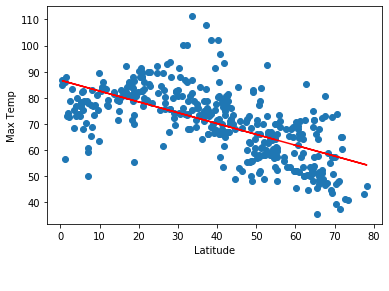

In [15]:
# Add the linear regression equation and line to plot
x_values = north_df["Lat"]
y_values = north_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("Lat_vs_Max_Temp_North.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5951673989791016


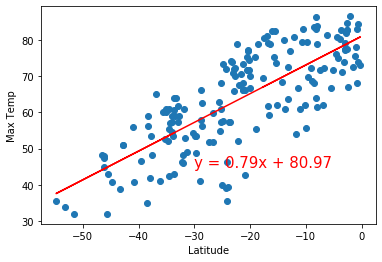

In [16]:
# Add the linear regression equation and line to plot
x_values = south_df["Lat"]
y_values = south_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,45),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("Lat_vs_Max_Temp_South.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0040310246380732264


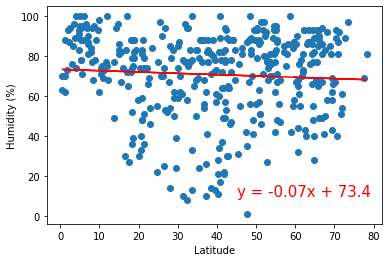

In [17]:
# Add the linear regression equation and line to plot
x_values = north_df["Lat"]
y_values = north_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Lat_vs_Humidity_North.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.019202482287096822


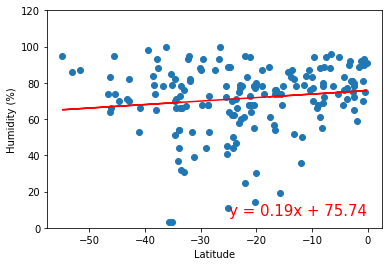

In [18]:
# Add the linear regression equation and line to plot
x_values = south_df["Lat"]
y_values = south_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,7),fontsize=15,color="red")
plt.ylim(0,120)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Lat_vs_Humidity_South.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0003626088778564356


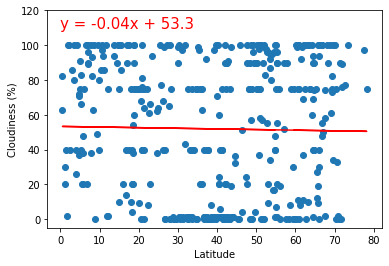

In [19]:

# Add the linear regression equation and line to plot
x_values = north_df["Lat"]
y_values = north_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,110),fontsize=15,color="red")
plt.ylim(-5,120)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Lat_vs_Cloudiness_North.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.034454424566134734


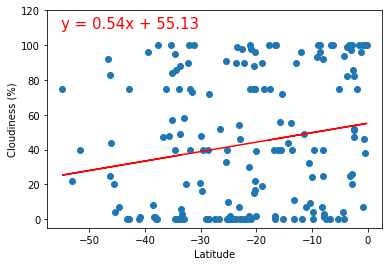

In [20]:
# Add the linear regression equation and line to plot
x_values = south_df["Lat"]
y_values = south_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,110),fontsize=15,color="red")
plt.ylim(-5,120)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Lat_vs_Cloudiness_South.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002746439808673691


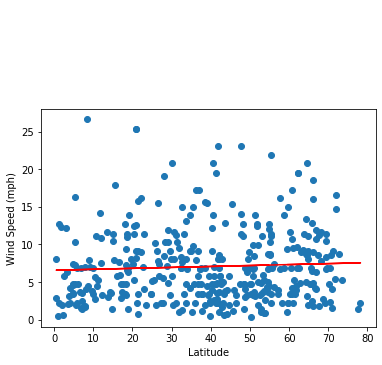

In [21]:
# Add the linear regression equation and line to plot
x_values = north_df["Lat"]
y_values = north_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Lat_vs_Wind_North.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.022034183949232695


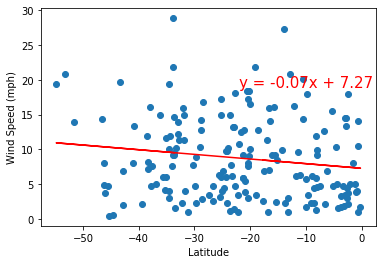

In [22]:
# Add the linear regression equation and line to plot
x_values = south_df["Lat"]
y_values = south_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-22,19),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Lat_vs_Wind_South.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()